In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
from utiles import plot_decision_boundary
import pandas as pd
import numpy as np

# Árboles de decisión

Los _árboles de decisión_ son algoritmos de Machine learning capaces de realizar tareas de clasificación y regresión. El algoritmo **CART** (_Classification and Regression Tree_) es el implementado por scikit-learn para el entrenamiento de los árboles de decisión. Este produce sólo _árboles binarios_

Los árboles resultantes son monotécnicos: árboles cuyas regiones de decisión están dadas por segmentos de rectas que siempre son perpendiculares a uno de los ejes de características.

Se prefieren los árboles simples y con menor número de nodos. La idea es buscar una medida en cada nodo de modo que los datos en los nodos hijos sean lo más puros posibles.

La impureza está relacionado a la cantidad de instancias que corresponden a distintas clases en el nodo. Sea $i(N)$ la impureza en el nodo N:

- $i(N)$ será 0 si todos los patrones que están presentes en el nodo pertenecen a la misma clase.
- $i(N)$ será máxima si hay igual cantidad de instancias de cada clase.


Con el algoritmo de estos clasificadores, iniciamos en la raiz del árbol y dividimos los datos teniendo en cuenta la característica que resulte en la mayor ganancia de información (IG). Mediante este proceso, continúa dividiendo cada nodo hijo hasta llegar a nodos hojas puros (es decir las muestras en estos nodos pertenecen a una sola clase), no quedan más características para continuar dividiendo o no quedan más instancias.

Esto en la práctica puede dar como resultado árboles profundos con muchos nodos, lo cual facilmente lleva al sobreajuste. Por esta razón, se suele realizar una poda (prune) para limitar la profundidad del árbol.

## Ganancia de Información (IG)

Función objetivo que se busca maximizar al dividir un nodo.

$$IG(S_p,f)=I(S_P)-\sum\limits_{j=1}^{N_j}\frac{N_j}{N_p}I(S_j)$$

$f$: es la característica que se usa para hacer la división

$S_p$ y  $S_j$: son los conjuntos de datos del nodo padre y el *j-èsimo* nodo hijo.

$I$: es la medida de impureza.

$N_p$: es el número total de muestras de entrenamiento en el nodo padre.

$N_j$: es el número de muestras en el *j-èsimo* nodo hijo.

> La ganancia de información es sólo la diferencia entre la impureza del nodo padre y la suma de las impurezas de los nodos hijos. A menor impureza en los nodos hijos, mayor ganancia de información.

## Entropía (impureza de entropía)

$$I_H(t) = -\sum\limits_{i=1}^{c}\frac{S_i}{S_p}log_2\frac{S_i}{S_p}$$

para cada una de las instancias divido por el nodo padre y calculo la entropia de cada nodo hijo.
para la entropia inicial del nodo padre: me fijo la cantidad de instancias en cada clase

## Impureza de Gini

$$I_G(t)=1-\sum\limits_{i=1}^{c}p(i)^2$$

In [2]:
iris = load_iris()

In [3]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
X = iris.data[:,[2,3]] #'petal length (cm)', 'petal width (cm)'
y = iris.target
X.shape

(150, 2)

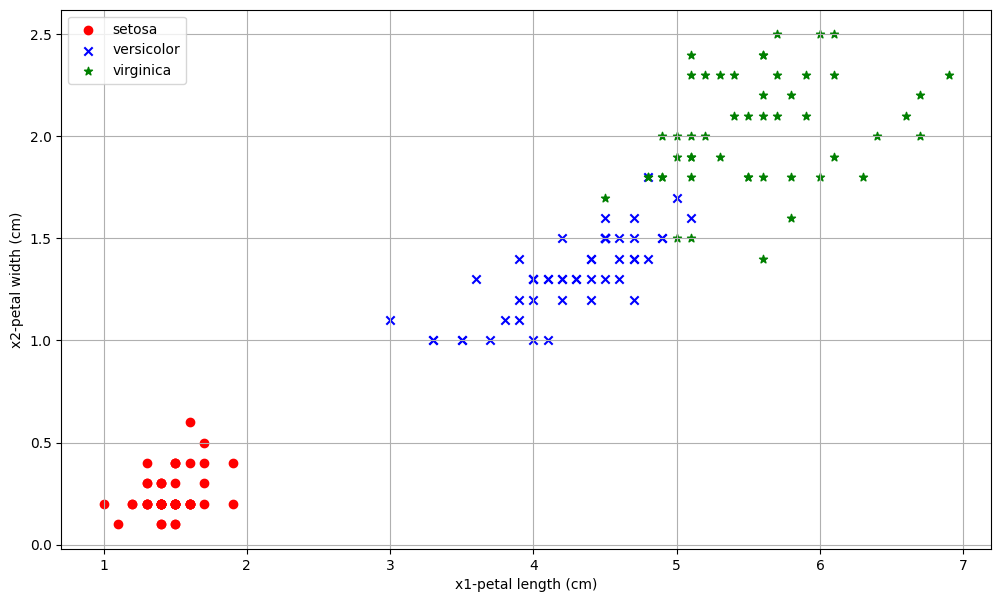

In [5]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150,0], X[100:150,1], color='green', marker='*', label='virginica')
plt.xlabel('x1-petal length (cm)')
plt.ylabel('x2-petal width (cm)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Documentación [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

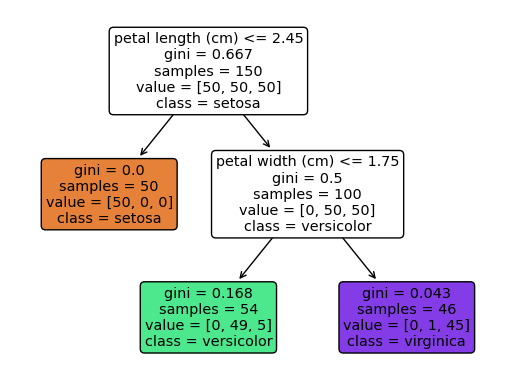

In [7]:
from sklearn import tree

tree.plot_tree(tree_clf,
               filled=True,
               rounded=True,
               class_names=['setosa', 'versicolor', 'virginica'],
               feature_names=iris.feature_names[2:]
               )
plt.show()

Instalador:
https://www.graphviz.org/download/

In [8]:
dot_data = export_graphviz(
        tree_clf,
        feature_names= iris.feature_names[2:],
        class_names= iris.target_names,
        rounded=True,
        filled=True,
)
graph = Source(dot_data)  
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

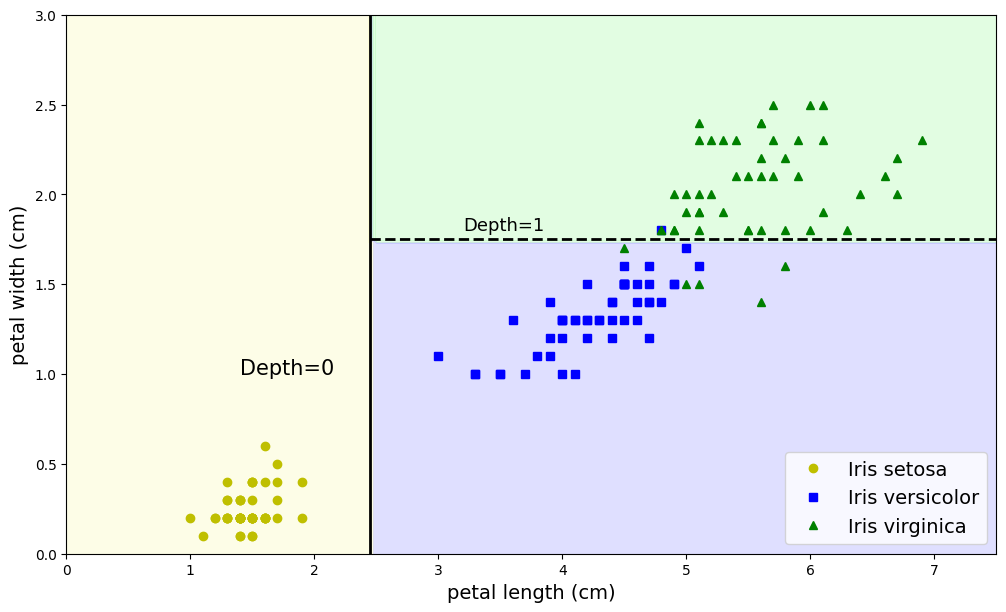

In [9]:
plt.figure(figsize=(12, 7))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.show()

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X,y)

dot_data = export_graphviz(
        tree_clf,
        feature_names= iris.feature_names[2:],
        class_names= iris.target_names,
        rounded=True,
        filled=True,
)
graph = Source(dot_data)  
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

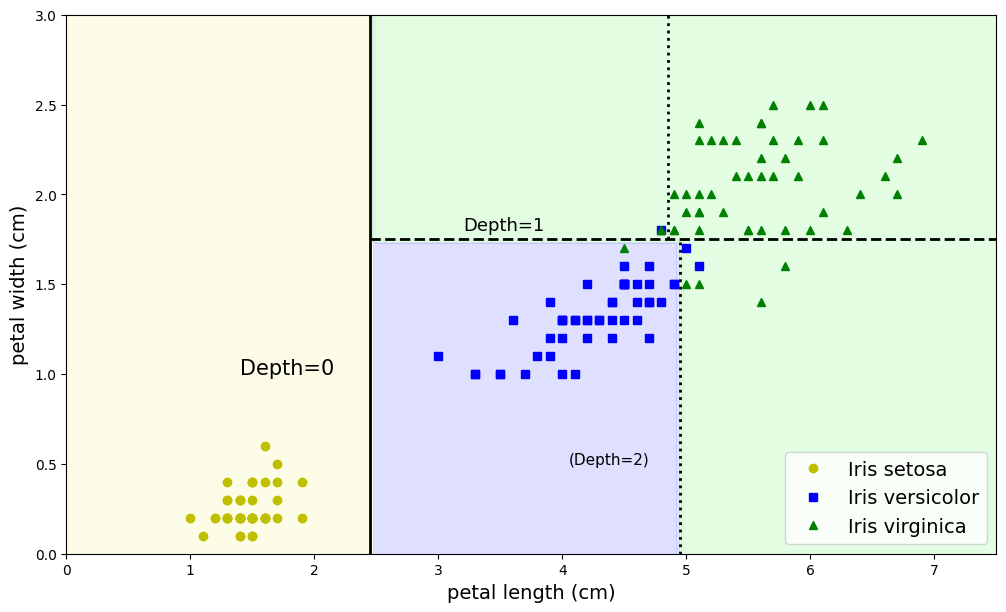

In [11]:
plt.figure(figsize=(12, 7))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

# Entregable
En la siguiente tabla se tienen datos acerca de la realización o suspensión de partidos de tenis en función del pronóstico del tiempo:


<table>
    <tbody>
        <tr>
            <td> </td>
            <td>Pronóstico</td>
            <td>Temperatura</td>
            <td>Humedad</td>
            <td>Viento</td>
            <td>Juega</td>
        </tr>
        <tr>
            <td>1</td><td>soleado</td><td>calor</td><td>alta</td><td>no</td><td>no</td>
        </tr>
        <tr>
            <td>2</td><td>soleado</td><td>calor</td><td>alta</td><td>si</td><td>no</td>
        </tr>
        <tr>
            <td>3</td><td>nublado</td><td>calor</td><td>alta</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>4</td><td>lluvioso</td><td>moderado</td><td>alta</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>5</td><td>lluvioso</td><td>frío</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>6</td><td>lluvioso</td><td>frío</td><td>normal</td><td>si</td><td>no</td>
        </tr>
        <tr>
            <td>7</td><td>nublado</td><td>frío</td><td>normal</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>8</td><td>soleado</td><td>moderado</td><td>alta</td><td>no</td><td>no</td>
        </tr>
        <tr>
            <td>9</td><td>soleado</td><td>frío</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>10</td><td>lluvioso</td><td>moderado</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>11</td><td>soleado</td><td>moderado</td><td>normal</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>12</td><td>nublado</td><td>moderado</td><td>alta</td><td>si</td><td>si</td>
        </tr>
        <tr>
            <td>13</td><td>nublado</td><td>calor</td><td>normal</td><td>no</td><td>si</td>
        </tr>
        <tr>
            <td>14</td><td>lluvioso</td><td>moderado</td><td>alta</td><td>si</td><td>no</td>
        </tr>
    </tbody>
</table>



1. Construya a mano (haciendo todas las cuentas) y dibuje en papel el árbol binario de decisión que describa los datos sobre juegos de tenis del cuadro.
Utilice la impureza de entropía.

2. Construya el árbol de decisión usando la clase `DecisionTreeClassifier`, para esto será necesario codificar los datos que se encuentran en el archivo `juego_tennis.csv`. Utilice `LabelEncoder`, `OrdinalEncoder` o `OneHotEncoder` pruebe distintas formas de codificar. Obtiene las mismas particiones que el árbol hecho a mano? Si o No? Por qué?

In [2]:
#codifico los datos que se encuentran en el archivo juego_tennis
tenis = pd.read_csv('./data/juego_tennis.csv')
tenis.head()

,Pronóstico,Temperatura,Humedad,Viento,Juega_Tennis
0,soleado,calor,alta,no,No
1,soleado,calor,alta,si,No
2,nublado,calor,alta,no,Si
3,lluvioso,moderado,alta,no,Si
4,lluvioso,frío,normal,no,Si


In [3]:
#separo en X e y:
X = tenis.iloc[:,:-1] #todas las filas y todas las columnas menos la ultima
y = tenis.iloc[:,-1] #todas las filas y la ultima columna

print("datos de entrenamiento: ", X)
print("datos de testeo: ", y)

datos de entrenamiento:     Pronóstico Temperatura Humedad Viento
0     soleado       calor    alta     no
1     soleado       calor    alta     si
2     nublado       calor    alta     no
3    lluvioso    moderado    alta     no
4    lluvioso        frío  normal     no
5    lluvioso        frío  normal     si
6     nublado        frío  normal     si
7     soleado    moderado    alta     no
8     soleado        frío  normal     no
9    lluvioso    moderado  normal     no
10    soleado    moderado  normal     si
11    nublado    moderado    alta     si
12    nublado       calor  normal     no
13   lluvioso    moderado    alta     si
datos de testeo:  0     No
1     No
2     Si
3     Si
4     Si
5     No
6     Si
7     No
8     Si
9     Si
10    Si
11    Si
12    Si
13    No
Name: Juega_Tennis, dtype: object


In [15]:
#creo el codificador:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder() #creo el codificador
encoder.fit_transform(X)
encoder1=encoder.transform(X).toarray()
etiquetas = encoder.get_feature_names_out()
etiquetas

array(['Pronóstico_lluvioso', 'Pronóstico_nublado', 'Pronóstico_soleado',
       'Temperatura_calor', 'Temperatura_frío', 'Temperatura_moderado',
       'Humedad_alta', 'Humedad_normal', 'Viento_no', 'Viento_si'],
      dtype=object)

El método transform del OneHotEncoder devuelve una matriz dispersa (sparse matrix) por defecto para ahorrar memoria, ya que las codificaciones one-hot pueden resultar en matrices con muchas columnas de ceros, lo que desperdiciaría memoria si se almacenara en un formato denso (array NumPy). Al llamar a toarray(), conviertes la matriz dispersa en un array denso, lo que facilita su uso en la mayoría de los modelos de aprendizaje automático que esperan datos en formato numérico y denso.

In [5]:
#Creamos un nuevo dataframe con las variables codificadas

df_cod = pd.DataFrame(encoder1, columns=etiquetas)
df_cod

,Pronóstico_lluvioso,Pronóstico_nublado,Pronóstico_soleado,Temperatura_calor,Temperatura_frío,Temperatura_moderado,Humedad_alta,Humedad_normal,Viento_no,Viento_si
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [6]:
#Creamos el modelo 
arbol = DecisionTreeClassifier( max_depth=4, random_state=42)
#crietion: criterio de impureza, entropy es la entropia
#max_depth: profundidad del arbol
#random_state: semilla para la generacion de numeros aleatorios

#entrenamos el modelo
arbol.fit(df_cod, y)
#x: variables de entrada
#y: variable de salida


DecisionTreeClassifier(max_depth=4, random_state=42)

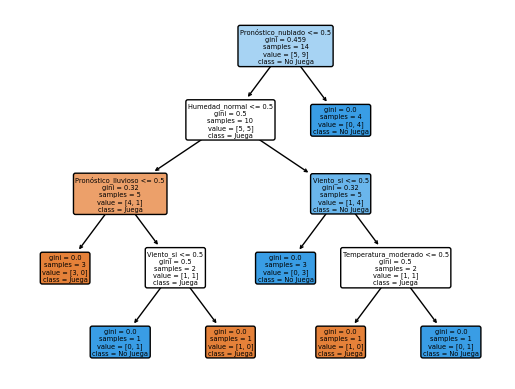

In [7]:
#Graficamos el arbol
from sklearn import tree
tree.plot_tree(arbol,
               filled=True,
               rounded=True,
               class_names=['Juega', 'No Juega'],
               feature_names=list(etiquetas)
               )
plt.show()

In [17]:
#separo en X e y para implementar el codificador label encoder:
X2 = tenis.iloc[:,:-1] #todas las filas y todas las columnas menos la ultima
y2 = tenis.iloc[:,-1] #todas las filas y la ultima columna

#print("datos de entrenamiento: ", X2)
#print("datos de testeo: ", y2)
y2

0     No
1     No
2     Si
3     Si
4     Si
5     No
6     Si
7     No
8     Si
9     Si
10    Si
11    Si
12    Si
13    No
Name: Juega_Tennis, dtype: object

In [ ]:
encoder = OneHotEncoder() #creo el codificador
encoder.fit_transform(X)
encoder1=encoder.transform(X).toarray()
etiquetas = encoder.get_feature_names_out()
encoder1

In [13]:
#usando otro codificador:
from sklearn.preprocessing import LabelEncoder

Lab_encoder = LabelEncoder()
Lab_encoder.fit_transform(X2)
#L_encoder1 = Lab_encoder.transform(X2).toarray()
#etiquetas2 = Lab_encoder.get_feature_names_out() #obtengo las etiquetas de las columnas

Lab_encoder
#df_cod_LE = pd.DataFrame(L_encoder1, columns=etiquetas2)
#df_cod_LE



ValueError: y should be a 1d array, got an array of shape (14, 4) instead.

In [11]:
#Creamos el modelo 
arbol_LE = DecisionTreeClassifier( max_depth=4, random_state=42)
#crietion: criterio de impureza, entropy es la entropia
#max_depth: profundidad del arbol
#random_state: semilla para la generacion de numeros aleatorios

#entrenamos el modelo
arbol_LE.fit(df_cod_LE, y)
#x: variables de entrada
#y: variable de salida

#Graficamos el arbol
from sklearn import tree
tree.plot_tree(arbol_LE,
               filled=True,
               rounded=True,
               class_names=['Juega', 'No Juega'],
               feature_names=list(etiquetas)
               )
plt.show()

NameError: name 'df_cod_LE' is not defined